<a href="https://colab.research.google.com/github/Shrey-Prabhu/DeepThinkers_YashPathare/blob/main/Stock_Prediction_(Amazon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [114]:
df=pd.read_csv('prices.csv')

In [115]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [116]:
df.isnull().sum()

,0
date,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [118]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [119]:
df.shape

(851264, 7)

In [120]:
df['symbol'].nunique()

501

In [121]:
df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [122]:
df1=df[df['symbol']=='AMZN']

In [123]:
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [124]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


In [125]:
# np.round(df1.median(),2)
np.round(df1.select_dtypes(include=np.number).median(),2)

,0
open,282.50
close,282.92
low,279.87
high,285.07
volume,3890700.00


In [126]:
df1['date']=pd.to_datetime(df1['date'])

In [127]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


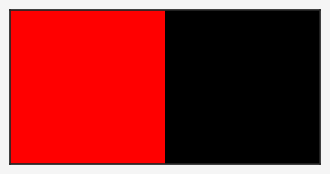

In [128]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF0000','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

Text(0.5, 1.0, 'AMAZON Stock value changes since 2010')

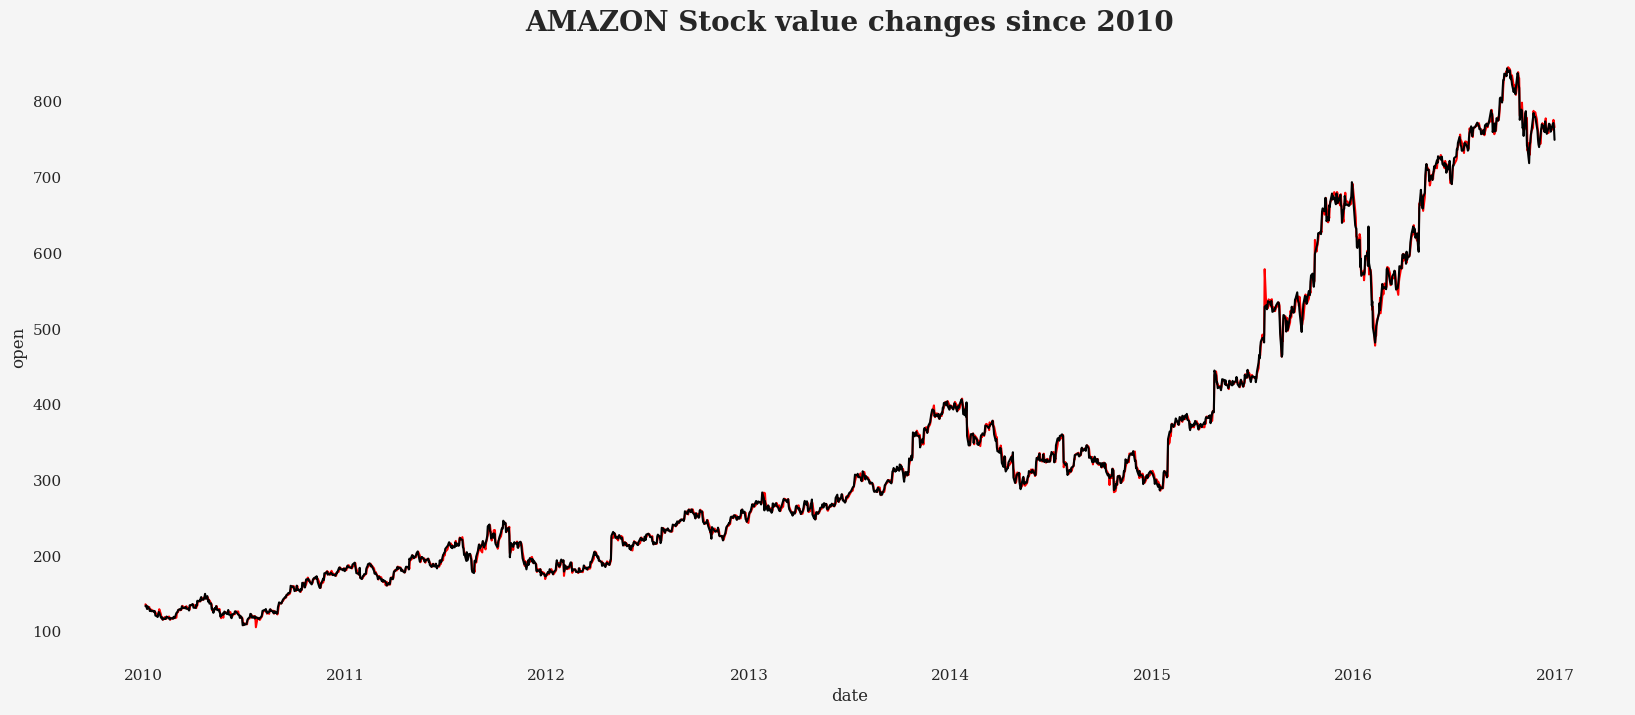

In [129]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

Text(0.5, 1.0, 'Google Stock volume')

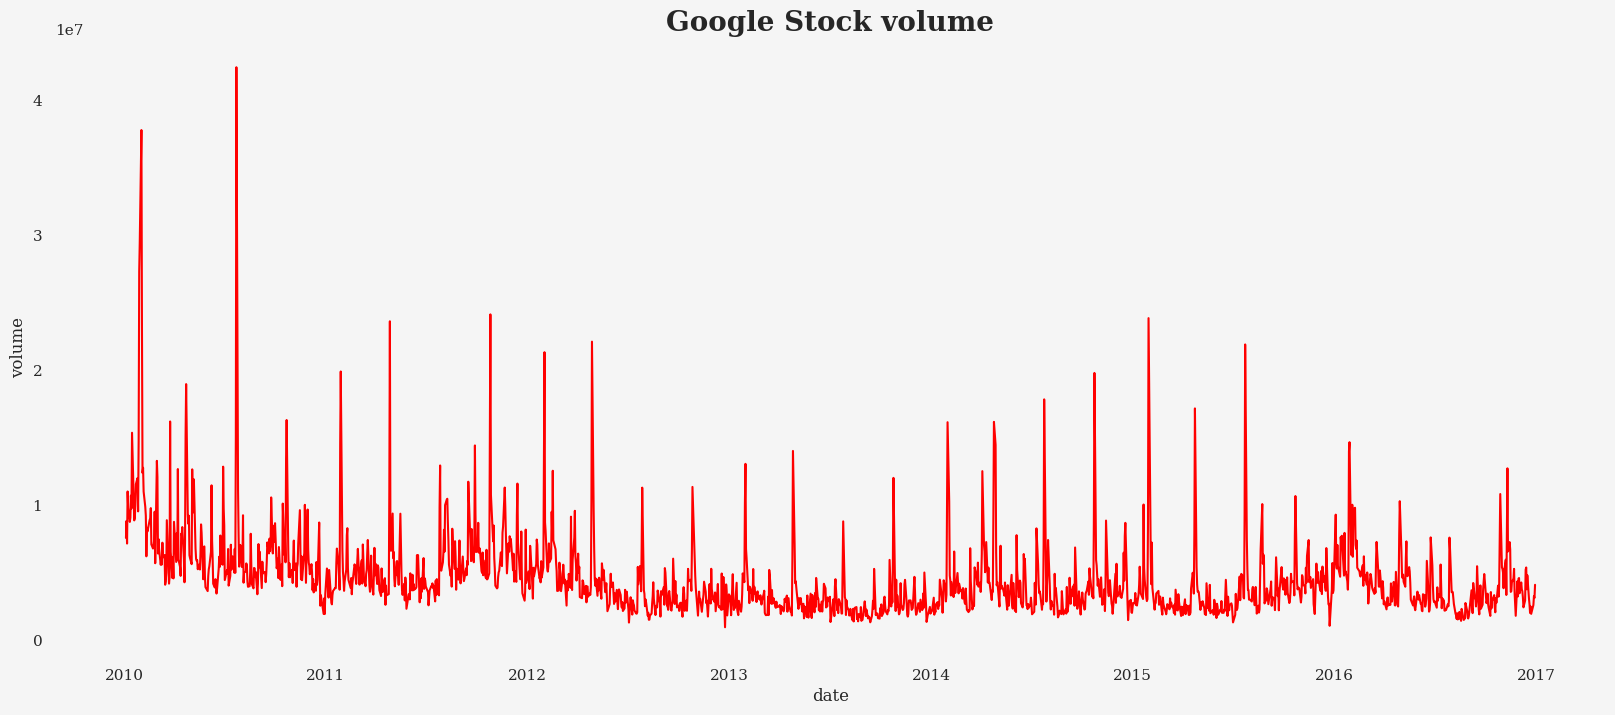

In [130]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='volume')
#ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Google Stock volume", size=20, weight='bold')

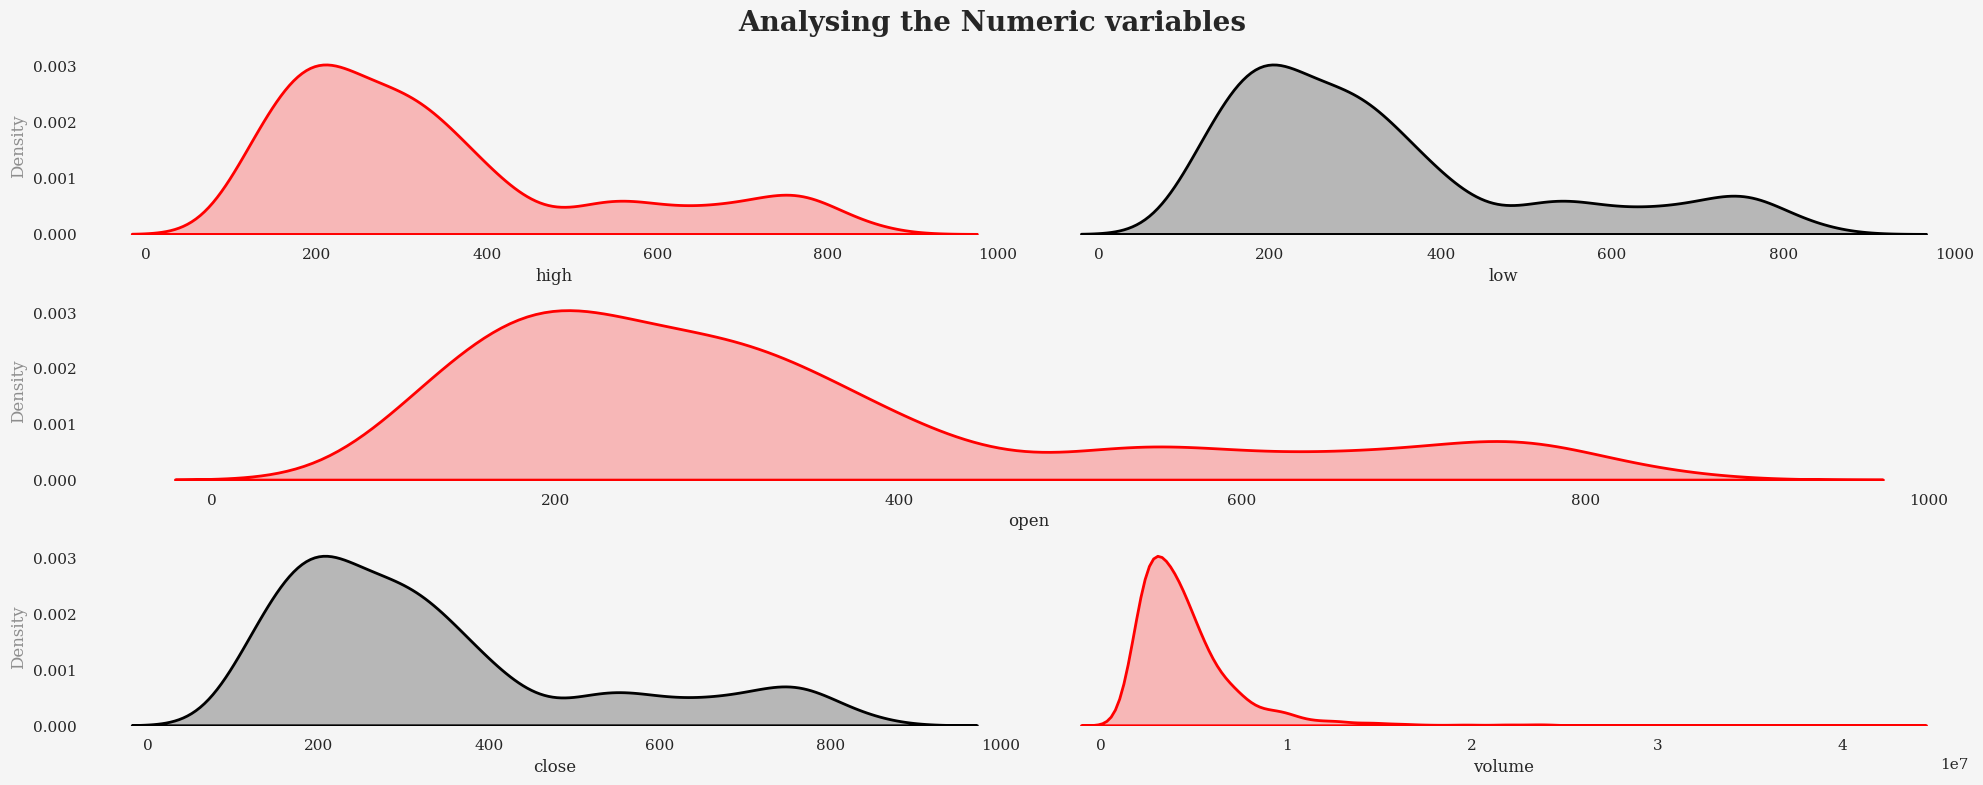

In [131]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df1['high'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df1['low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df1['close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

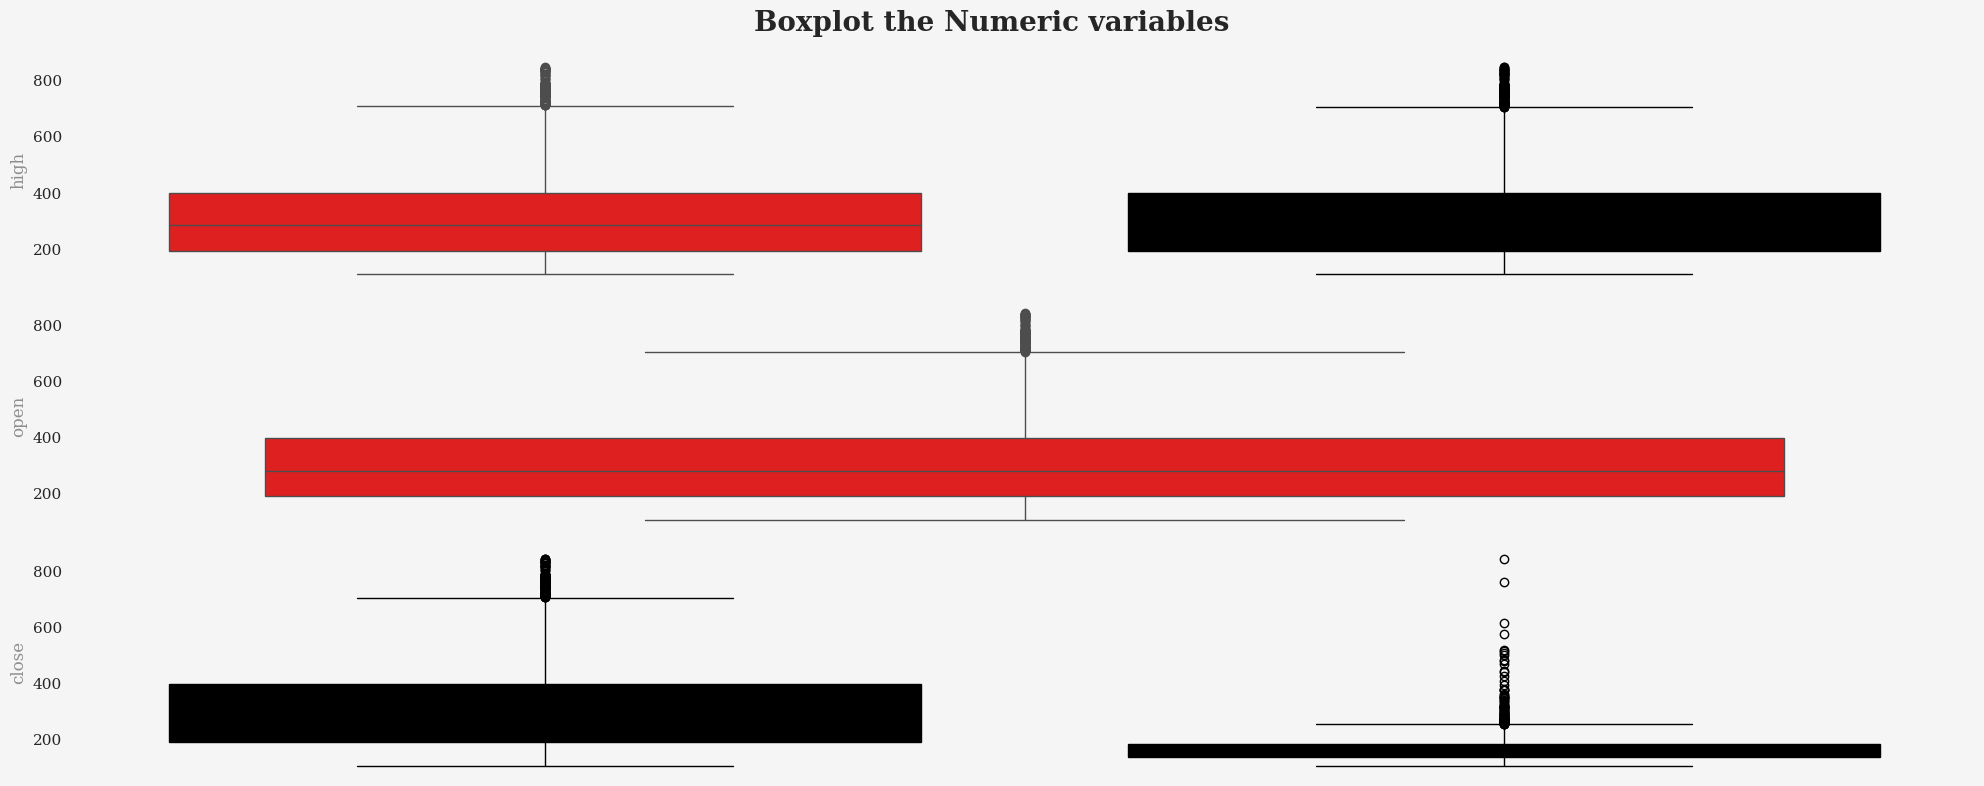

In [132]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df1['high'], ax=ax['A'], color=colors[0])
sns.boxplot(df1['low'], ax=ax['B'], color=colors[1])
sns.boxplot(df1['open'], ax=ax['C'], color=colors[0])
sns.boxplot(df1['close'], ax=ax['D'], color=colors[1])
sns.boxplot(df1['volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

In [133]:
df1.drop(['symbol'], axis=1, inplace=True)

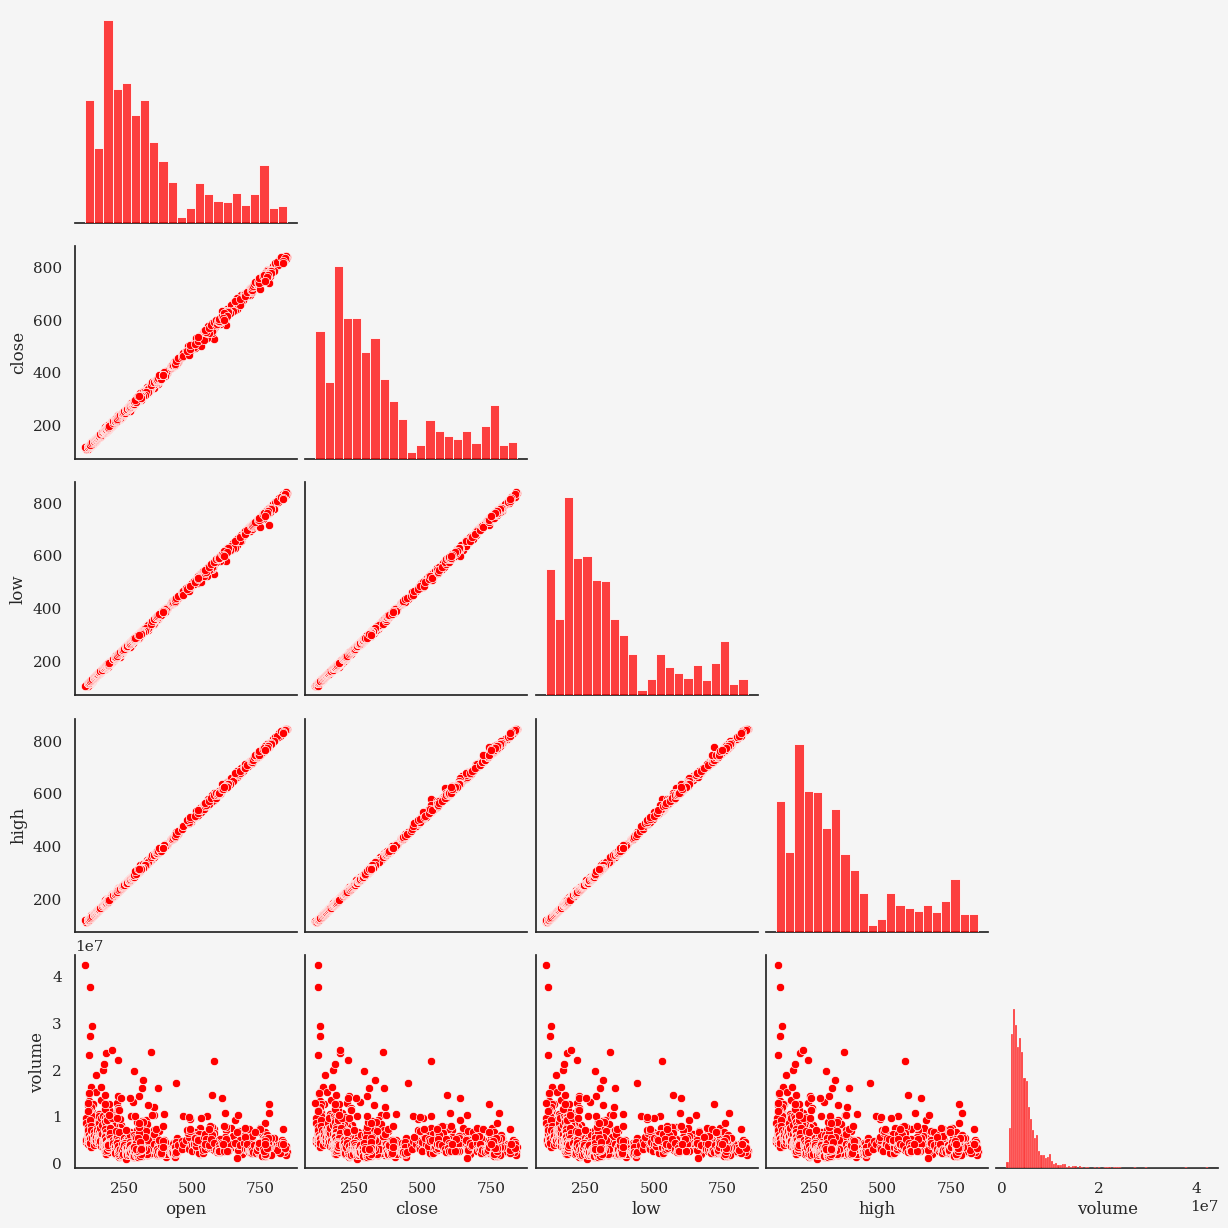

In [134]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable.
sns.pairplot(df1,corner=True)

In [135]:
df1.corr()['close']

,close
date,0.908957
open,0.999581
close,1.000000
low,0.999832
high,0.999811
volume,-0.238560


In [136]:
from scipy.stats import levene, shapiro
int_cols=df1.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))

    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))

Feature date is normaly distributed
Normalitiy test p_value for featue -  date is 0.0
Feature open is normaly distributed
Normalitiy test p_value for featue -  open is 0.0
Feature close is normaly distributed
Normalitiy test p_value for featue -  close is 0.0
Feature low is normaly distributed
Normalitiy test p_value for featue -  low is 0.0
Feature high is normaly distributed
Normalitiy test p_value for featue -  high is 0.0
Feature volume is normaly distributed
Normalitiy test p_value for featue -  volume is 0.0


<Axes: >

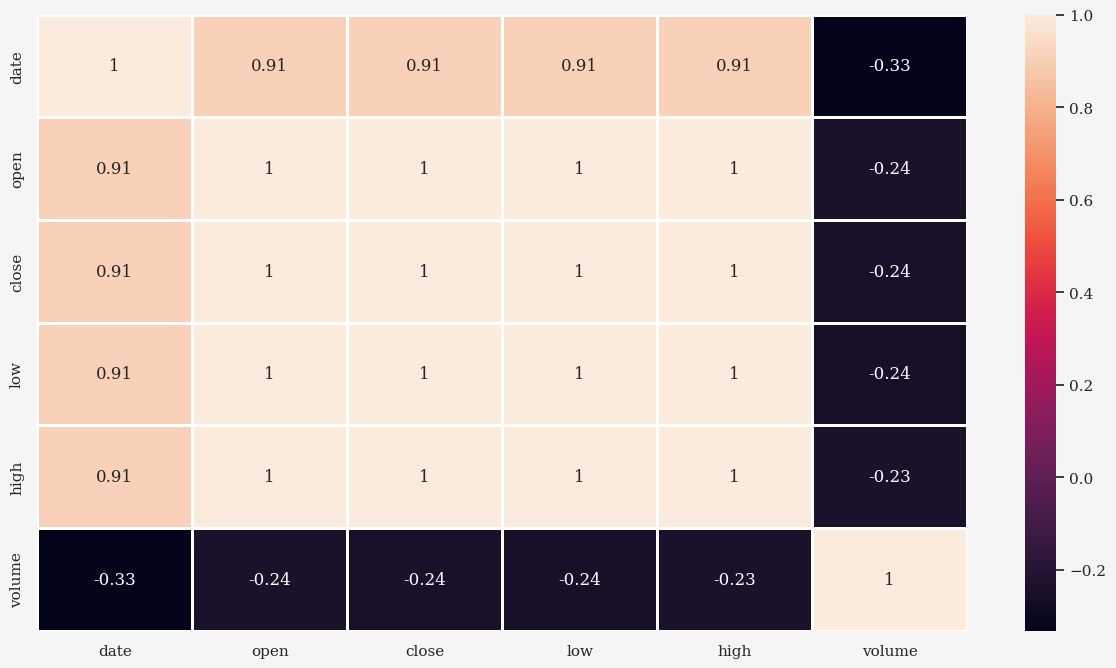

In [138]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, linecolor='white', linewidth=2 )

In [89]:
X=df1[['open','high']]
y=df1['close']
length=100

In [91]:
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)

In [93]:
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [94]:
X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [95]:
X_train

array([[[0.10345651],
        [0.09383421],
        [0.09782648],
        ...,
        [0.05677824],
        [0.04302727],
        [0.0652404 ]],

       [[0.09383421],
        [0.09782648],
        [0.08898896],
        ...,
        [0.04302727],
        [0.0652404 ],
        [0.06500155]],

       [[0.09782648],
        [0.08898896],
        [0.08404135],
        ...,
        [0.0652404 ],
        [0.06500155],
        [0.06872078]],

       ...,

       [[0.69996931],
        [0.68853858],
        [0.67553828],
        ...,
        [0.95332176],
        [0.9523322 ],
        [0.97150849]],

       [[0.68853858],
        [0.67553828],
        [0.67270614],
        ...,
        [0.9523322 ],
        [0.97150849],
        [0.96666329]],

       [[0.67553828],
        [0.67270614],
        [0.67799504],
        ...,
        [0.97150849],
        [0.96666329],
        [0.98386047]]])

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 30, batch_size = 32)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - loss: 0.0581 - val_loss: 0.1426
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 237ms/step - loss: 0.0046 - val_loss: 0.0922
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.0037 - val_loss: 0.1190
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - loss: 0.0038 - val_loss: 0.0402
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 278ms/step - loss: 0.0032 - val_loss: 0.0259
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 0.0035 - val_loss: 0.0208
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 0.0037 - val_loss: 0.0177
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - loss: 0.0031 - val_loss: 0.0229
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - loss: 0.0041 - val_loss: 0.0357
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 239ms/step - loss: 0.0030 - val_loss: 0.0198
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - loss: 0.0029 - val_loss: 0.0252
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms

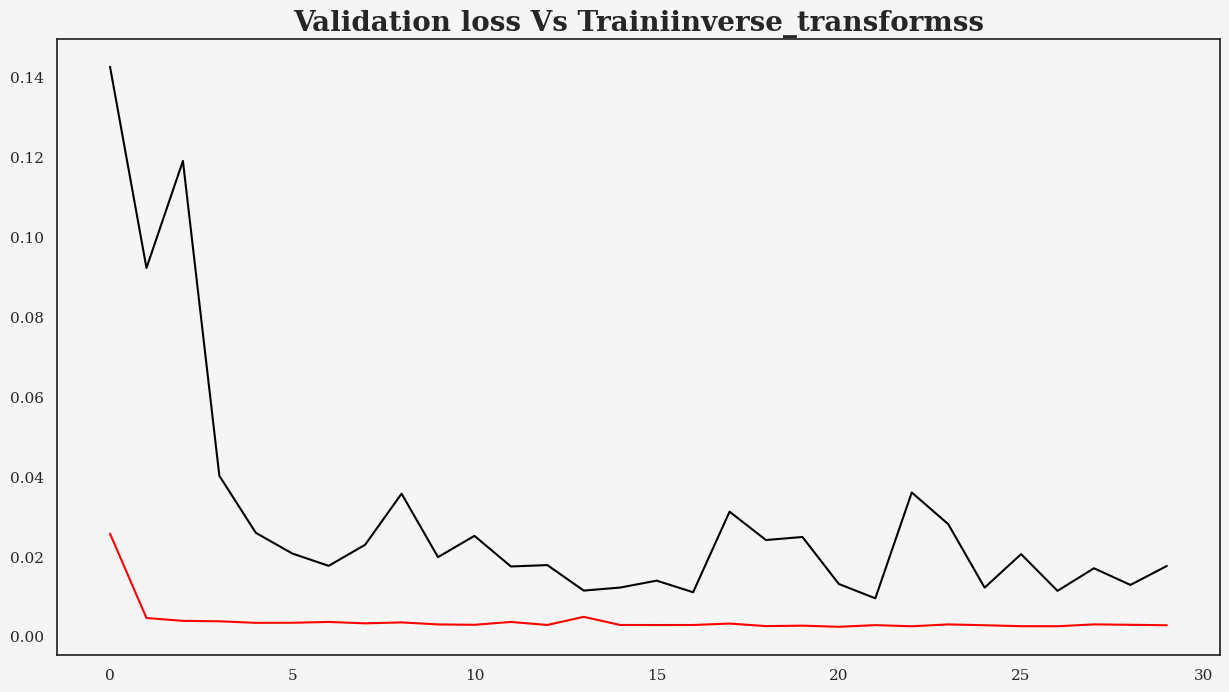

In [142]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Trainiinverse_transformss", size=20, weight='bold')
plt.plot(loss)

In [87]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


,test,pred
0,0.647729,0.662727
1,0.652302,0.659433
2,0.669738,0.656700
3,0.679428,0.654667
4,0.680827,0.653534
...,...,...
657,2.247313,1.971309
658,2.243389,1.971550
659,2.287235,1.971599
660,2.274098,1.971850


Text(500, 1.25, 'Mean Absolute error : 0.13')

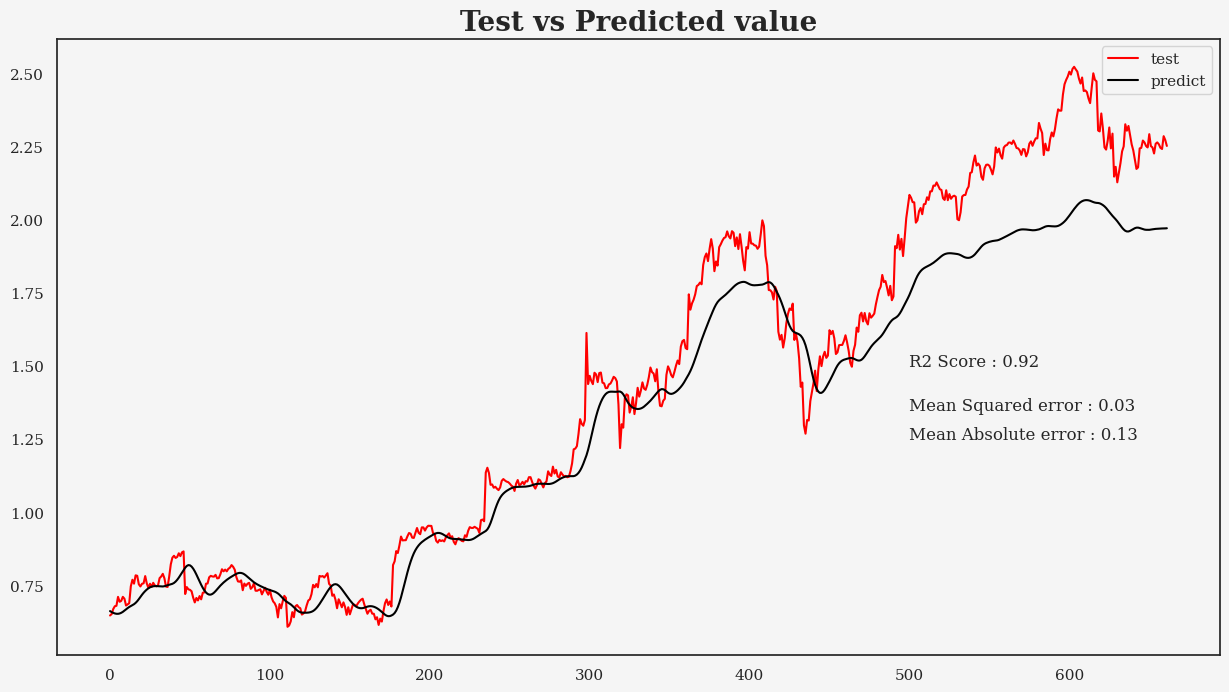

In [140]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_absolute_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))